<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_project/blob/research%2Fnoga/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
DATA_PATH = "https://github.com/dattali18/machine_learning_msc_project/blob/main/db/heart.csv?raw=true"

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# for bagging
# The basic (weak) model
from sklearn.ensemble import BaggingClassifier
# The envelope that surrounds many such models
from sklearn.tree import DecisionTreeClassifier
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Boosting
from sklearn.ensemble import AdaBoostClassifier
#color
from matplotlib.colors import LinearSegmentedColormap
#for Visuals of tree
from sklearn.tree import plot_tree

In [340]:
def plot_medical_confusion_matrix(y_true, y_pred, figsize=(8, 6), title='Confusion Matrix'):
    """
    Create a heatmap for a medical confusion matrix with light cream and blue colors.

    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    figsize : tuple
        Figure size (width, height)
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Extract TP, FN, FP, TN
    tn, fp, fn, tp = cm.ravel()

    # Create the confusion matrix in the correct order
    confusion_matrix_display = np.array([[tp, fn],
                                          [fp, tn]])

    # Create labels
    labels = np.array([['TP', 'FN'],
                       ['FP', 'TN']])

    # Create custom light color palette (cream to light blue)
    colors = ['#FFF8E7', '#E8F4F8', '#B8D8E8', '#8CC4DD']  # Cream to light blue
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('cream_blue', colors, N=n_bins)

    # Create the heatmap
    plt.figure(figsize=figsize)
    ax = sns.heatmap(confusion_matrix_display,
                     annot=labels,
                     fmt='',
                     cmap=cmap,
                     cbar_kws={'label': 'Count'},
                     linewidths=2,
                     linecolor='white',
                     square=True,
                     vmin=0)

    # Add the actual values as text
    for i in range(2):
        for j in range(2):
            text = ax.text(j + 0.5, i + 0.7,
                          f'{confusion_matrix_display[i, j]:.0f}',
                          ha='center', va='center',
                          color='#555555', fontsize=11, fontweight='bold')

    # Set labels - Prediction on top, Actual on side
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    plt.xlabel('Prediction', fontsize=12, fontweight='bold')
    plt.ylabel('Actual', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', pad=20)

    # Set tick labels
    ax.set_xticklabels(['Positive', 'Negative'])
    ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')

    plt.tight_layout()
    plt.show()


In [341]:
heart_data = pd.read_csv(DATA_PATH)

In [342]:
heart_data.T

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
age,52.0,53.0,70.0,61.0,62.0,58.0,58.0,55.0,46.0,54.0,...,58.0,65.0,53.0,41.0,47.0,59.0,60.0,47.0,50.0,54.0
sex,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
trestbps,125.0,140.0,145.0,148.0,138.0,100.0,114.0,160.0,120.0,122.0,...,128.0,138.0,123.0,110.0,112.0,140.0,125.0,110.0,110.0,120.0
chol,212.0,203.0,174.0,203.0,294.0,248.0,318.0,289.0,249.0,286.0,...,216.0,282.0,282.0,172.0,204.0,221.0,258.0,275.0,254.0,188.0
fbs,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
restecg,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
thalach,168.0,155.0,125.0,161.0,106.0,122.0,140.0,145.0,144.0,116.0,...,131.0,174.0,95.0,158.0,143.0,164.0,141.0,118.0,159.0,113.0
exang,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
oldpeak,1.0,3.1,2.6,0.0,1.9,1.0,4.4,0.8,0.8,3.2,...,2.2,1.4,2.0,0.0,0.1,0.0,2.8,1.0,0.0,1.4


#Target variable
*   target = 1 → Heart disease
*   target = 0 → No heart disease

#Features (examples):
*   age – age in years
*   sex – 1 = male, 0 = female
*   cp – chest pain type
*   trestbps – resting blood pressure
*   chol – serum cholesterol
*   thalach – max heart rate achieved
*   exang – exercise-induced angina
*   oldpeak – ST depression
*   ca – number of major vessels
*   thal – thalassemia


*   X – the input (features)
*   y – the output (label / target)

In [343]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

#Train–Test Split

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

#Feature Scaling


In [345]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Bagging
What you are shown is the model built in memory after fit
A hierarchical structure of the model is shown:

▶ BaggingClassifier

 ⬇ Contains

▶ Many DecisionTreeClassifier

This is exactly the idea of ​​Bagging.

Instead of one smart tree → many simple trees that point


*More trees = more stability (up to a certain limit)*

In [346]:
# Create Bagging model
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),   # Base model: Decision Tree
    n_estimators=15,                      # 10 trees
    max_samples=0.7,                      # each tree trains on 80% of training rows (bootstrap)
    max_features=0.8,                     # each tree sees 100% of features
    random_state=42
)

# Train
bagging_model.fit(X_train, y_train)

# Predict
y_pred_bagging = bagging_model.predict(X_test)
y_true = y_test

#Evaluation for Bagging Modal

In [347]:
accuracy_bagging  = accuracy_score(y_true, y_pred_bagging)
precision_bagging = precision_score(y_true, y_pred_bagging)
recall_bagging    = recall_score(y_true, y_pred_bagging)
f1_bagging        = f1_score(y_true, y_pred_bagging)

# 4) Print results
print("Evaluation of Bagging Modal :")
print("Accuracy  :", accuracy_bagging)
print("Precision :", precision_bagging)
print("Recall    :", recall_bagging)
print("F1-score  :", f1_bagging)

Evaluation of Bagging Modal :
Accuracy  : 0.9804878048780488
Precision : 0.9809523809523809
Recall    : 0.9809523809523809
F1-score  : 0.9809523809523809


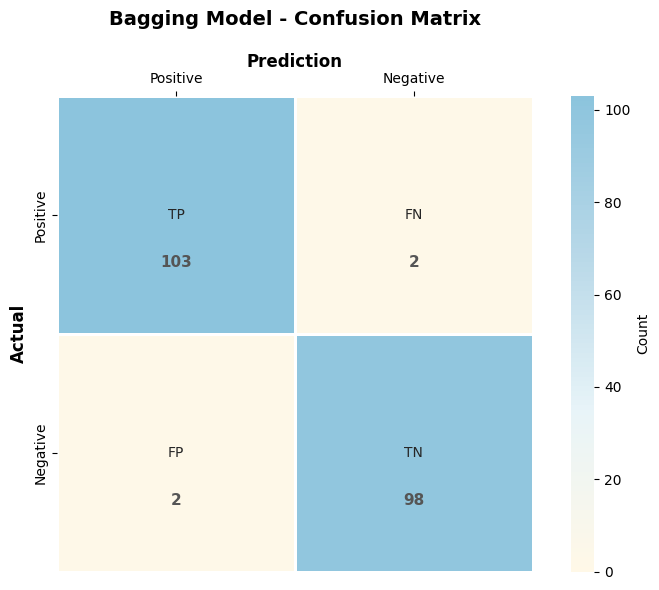

In [348]:
# Use it with your bagging model predictions
plot_medical_confusion_matrix(y_true, y_pred_bagging, title='Bagging Model - Confusion Matrix')

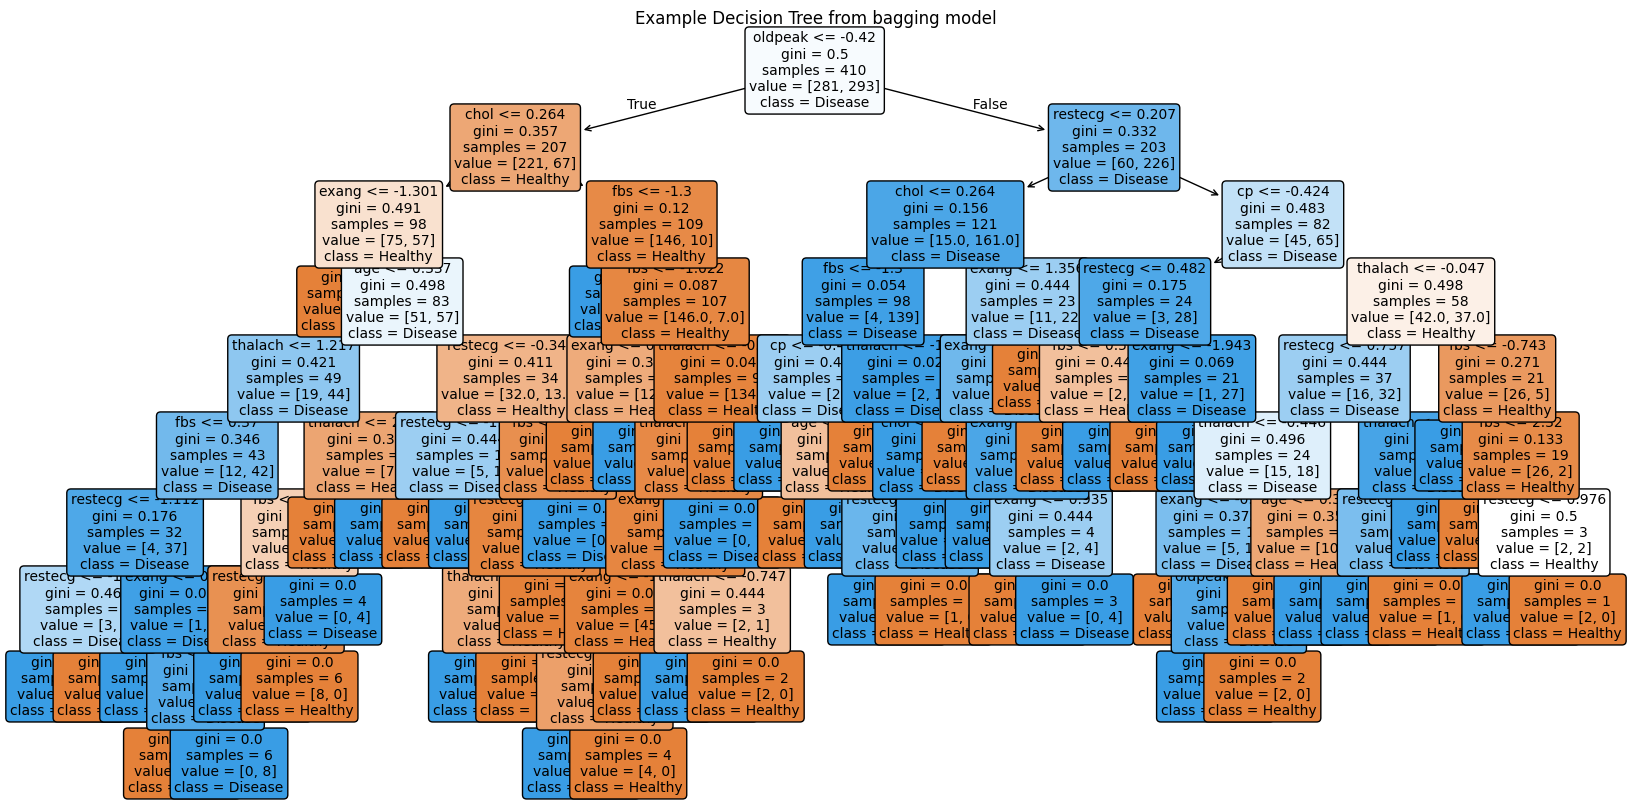

In [349]:
tree = bagging_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,   # אם X הוא DataFrame
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from bagging model")
plt.show()

# Bagging Modal using Gini Criterion

Let's train a Bagging Classifier where the base estimator is a Decision Tree that uses the Gini impurity for splitting. This is the default criterion for DecisionTreeClassifier.

In [350]:
# 1) Create the Bagging model (with DecisionTree using Gini)
bagging_gini = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion="gini",
        # Limits tree depth to 5 → helps reduce overfitting.
        max_depth=5,
        # The tree will not split if there are fewer than 10 examples at the node → less than a “perfect” match.
        min_samples_split=10,
        # Each leaf must contain at least 5 samples → helps greatly against overfitting.
        min_samples_leaf=5
    ),
    # Number of trees in the ensemble
    n_estimators=50,
    random_state=42
)

# 2) Train the model
bagging_gini.fit(X_train, y_train)

# 3) Predict on test set
y_pred_bagging_gini = bagging_gini.predict(X_test)

y_true = y_test

#Evaluation for Bagging Modal using Gini

In [351]:
accuracy_bagging_gini  = accuracy_score(y_true, y_pred_bagging_gini)
precision_bagging_gini = precision_score(y_true, y_pred_bagging_gini)
recall_bagging_gini    = recall_score(y_true, y_pred_bagging_gini)
f1_bagging_gini        = f1_score(y_true, y_pred_bagging_gini)

print("--- Evaluation of Bagging Modal using Gini ---")
print("Accuracy :", accuracy_bagging_gini)
print("Precision:", precision_bagging_gini)
print("Recall   :", recall_bagging_gini)
print("F1-score :", f1_bagging_gini)

--- Evaluation of Bagging Modal using Gini ---
Accuracy : 0.926829268292683
Precision: 0.9017857142857143
Recall   : 0.9619047619047619
F1-score : 0.9308755760368663


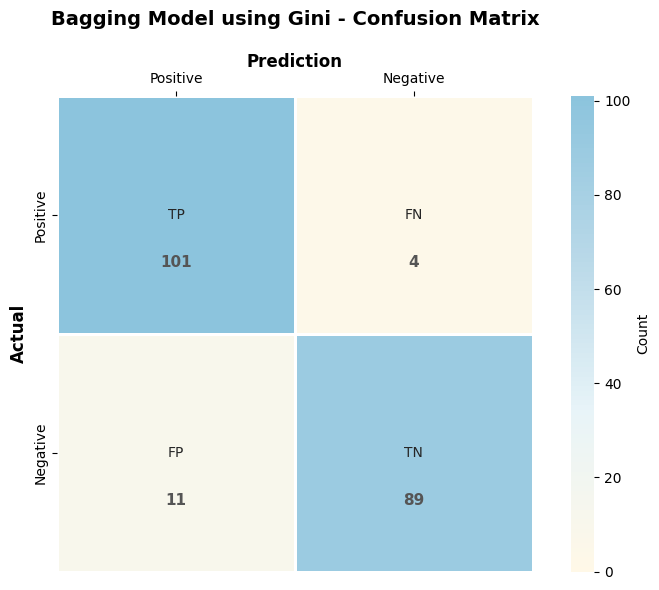

In [352]:
plot_medical_confusion_matrix(y_true, y_pred_bagging_gini, title='Bagging Model using Gini - Confusion Matrix')

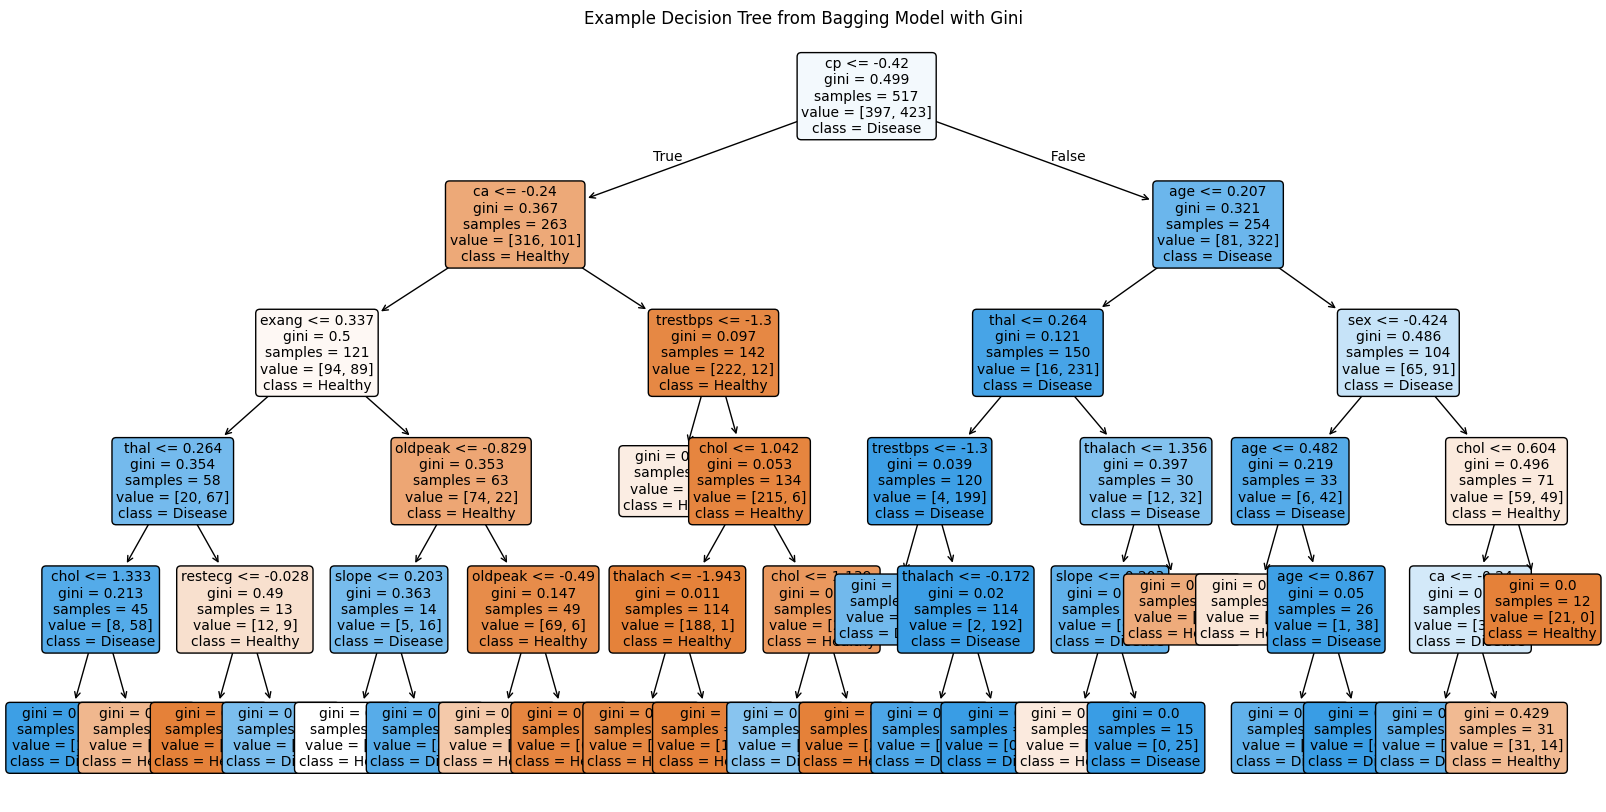

In [353]:
tree = bagging_gini.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,   # אם X הוא DataFrame
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from Bagging Model with Gini")
plt.show()

# Bagging with Entropy (Information Gain) Criterion

Now, let's train another Bagging Classifier, but this time using a Decision Tree that splits nodes based on the Entropy (information gain) criterion.

In [354]:
bagging_entropy = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion="entropy"
    ),
    n_estimators=10,   # 10 trees
    max_samples=0.8,
    max_features=1.0,
    random_state=42
)

bagging_entropy.fit(X_train, y_train)
# Generates predictions for the test set: this is a vector of 0/1.
y_pred_bagging_Entropy = bagging_entropy.predict(X_test)

y_true = y_test

#Evaluation for bagging with Entropy Modal

In [355]:
accuracy_bagging_Entropy  = accuracy_score(y_true, y_pred_bagging_Entropy)
precision_bagging_Entropy = precision_score(y_true, y_pred_bagging_Entropy)
recall_bagging_Entropy    = recall_score(y_true, y_pred_bagging_Entropy)
f1_bagging_Entropy        = f1_score(y_true, y_pred_bagging_Entropy)

# 4) Print results
print("--- Bagging Modal using Entropy ---")
# How many percent of the total did we guess correctly
print("Accuracy :",accuracy_bagging_Entropy)
# Of those we classified as sick (1), how many were actually sick
print("Precision:", precision_bagging_Entropy)
# Of the real sick (1), how many were we able to detect
print("Recall   :", recall_bagging_Entropy)
# Harmonic average of precision and recall.
print("F1-score :", f1_bagging_Entropy)

--- Bagging Modal using Entropy ---
Accuracy : 0.9902439024390244
Precision: 1.0
Recall   : 0.9809523809523809
F1-score : 0.9903846153846154


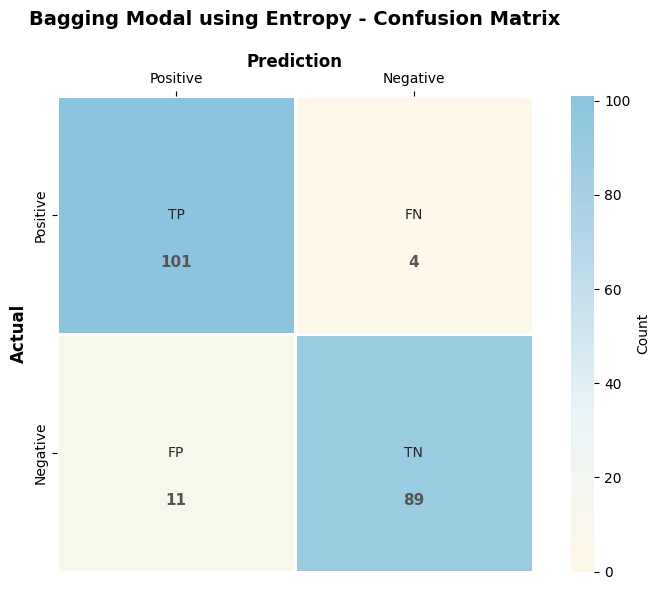

In [356]:
plot_medical_confusion_matrix(y_true, y_pred_bagging_gini, title='Bagging Modal using Entropy - Confusion Matrix')

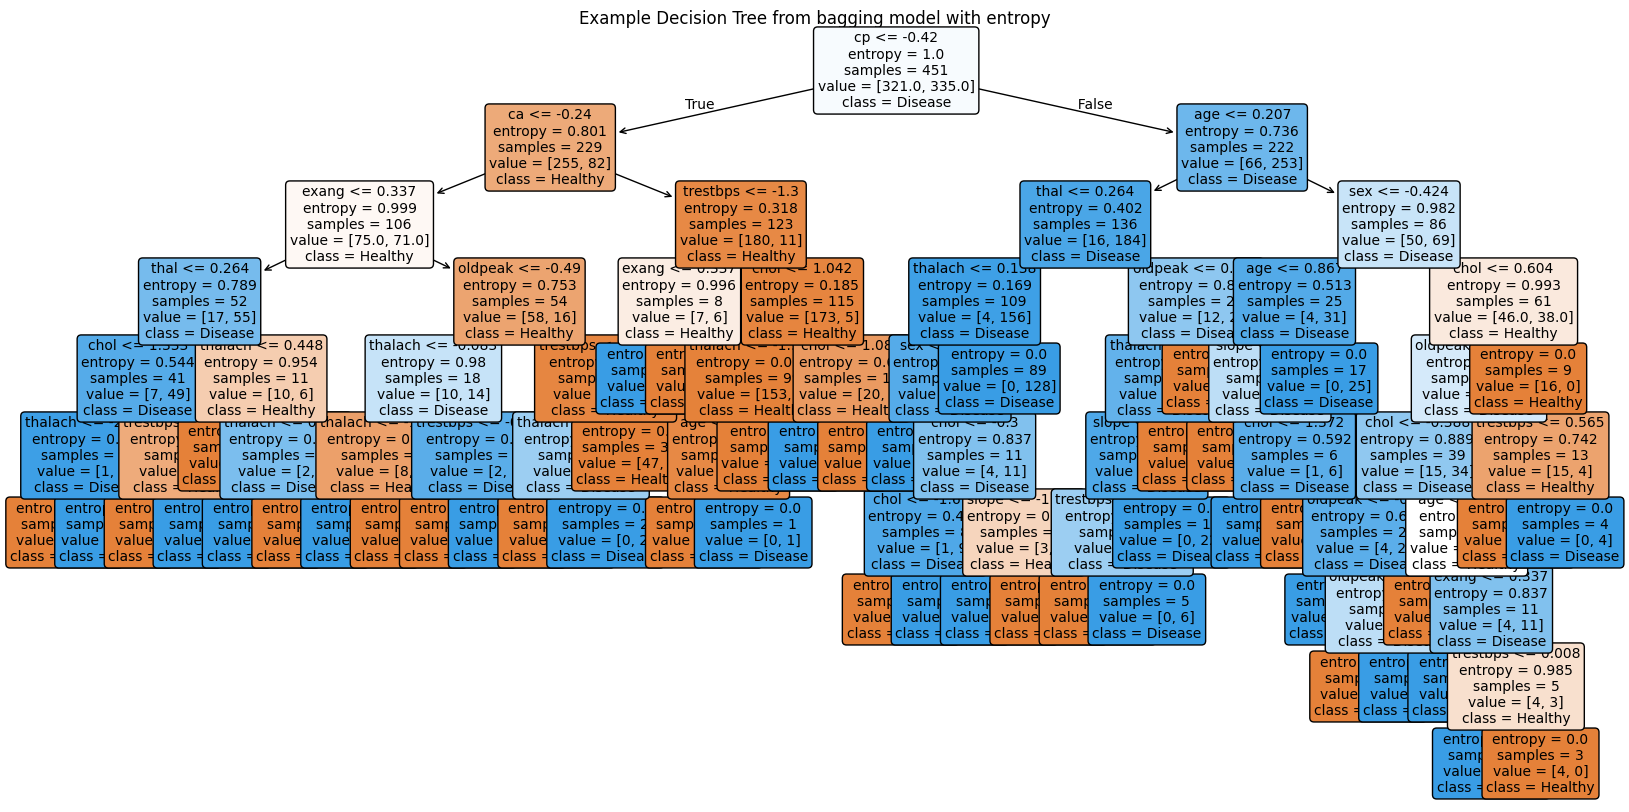

In [357]:
tree = bagging_entropy.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,   # אם X הוא DataFrame
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from bagging model with entropy")
plt.show()

# Boosting Modal

Models are trained sequentially

Each new model focuses on previous mistakes

Final prediction = weighted vote

📌 Reduces bias and improves accuracy

🔹 Boosting Model Choice

We’ll use: AdaBoost *(classic and easy to explain)*

In [358]:
boosting_model = AdaBoostClassifier(
    n_estimators=100,
    # How much “weight” is given to each new model. Smaller = slower and more careful learning (sometimes helps against overfitting).
    learning_rate=0.1,
    random_state=42
)

boosting_model.fit(X_train, y_train)

y_pred_boosting = boosting_model.predict(X_test)


# Evaluation for Boosting Modal

In [359]:
y_true = y_test

accuracy_boosting = accuracy_score(y_true,  y_pred_boosting)
precision_boosting = precision_score(y_true,  y_pred_boosting)
recall_boosting = recall_score(y_true,  y_pred_boosting)
f1_boosting = f1_score(y_true,  y_pred_boosting)

# Print results
print("--- Boosting Modal ---")
# How many percent of the total we guessed correctly.
print("Accuracy :", accuracy_boosting)
# Of those we classified as sick (1), how many are really sick.
print("Precision:", precision_boosting)
# Of the real sick (1), how many were we able to detect.
print("Recall   :", recall_boosting)
# Harmonic average of precision and recall.
print("F1-score :", f1_boosting)

--- Boosting Modal ---
Accuracy : 0.8780487804878049
Precision: 0.8636363636363636
Recall   : 0.9047619047619048
F1-score : 0.8837209302325582


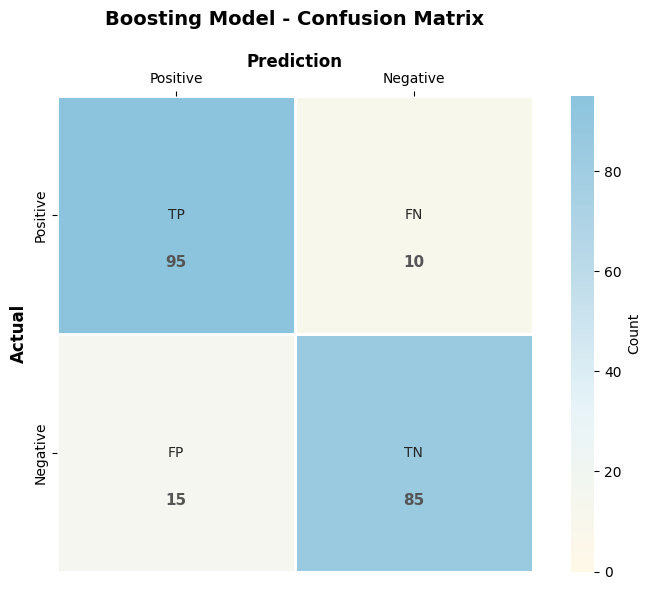

In [360]:
plot_medical_confusion_matrix(y_true, y_pred_boosting, title='Boosting Model - Confusion Matrix')

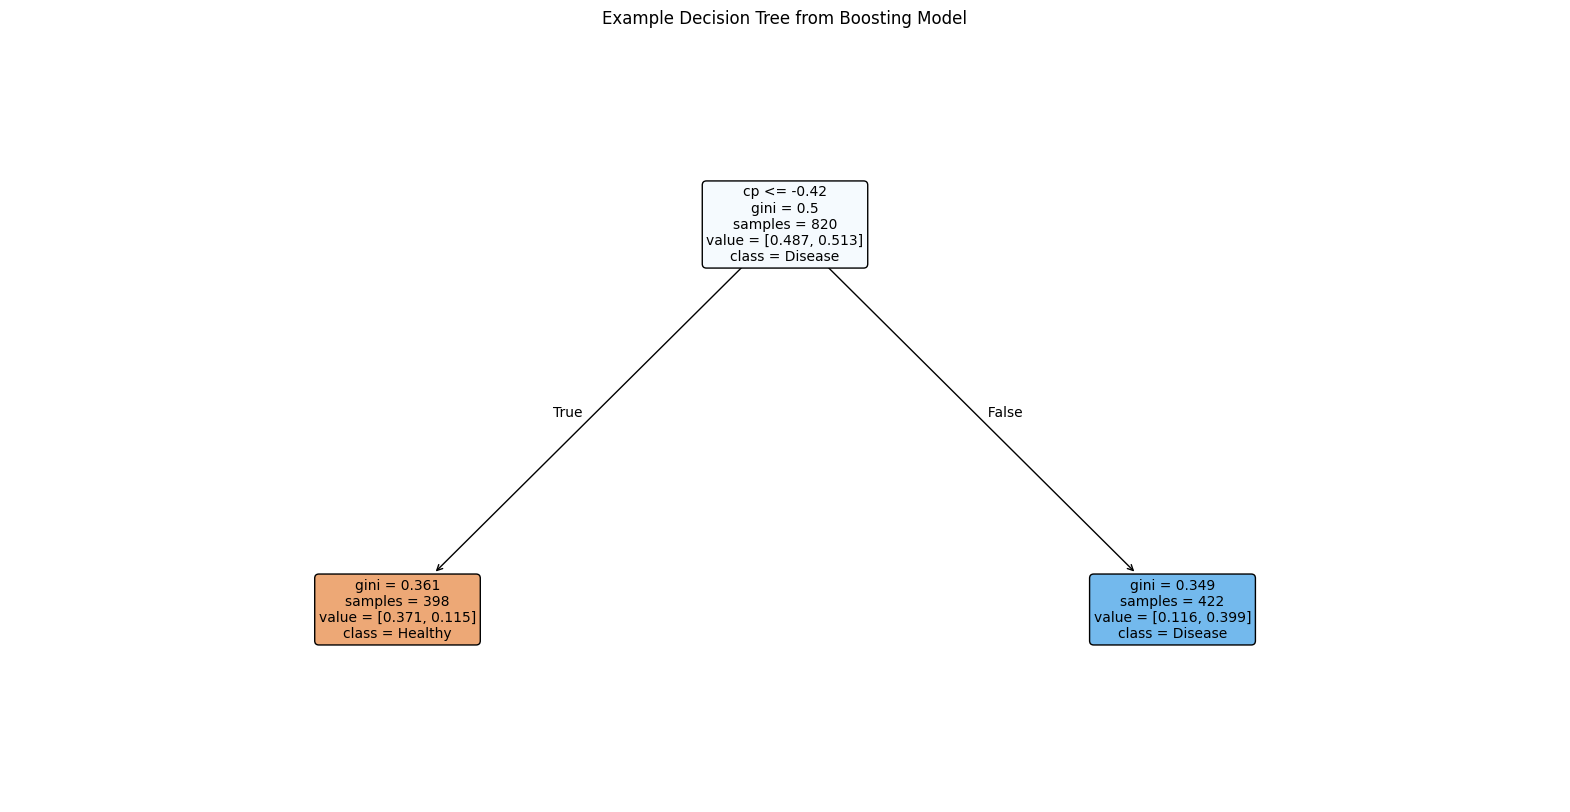

In [361]:
tree = boosting_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,   # אם X הוא DataFrame
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from Boosting Model")
plt.show()

### Boosting Modal using Gini Criterion

Let's train a Boosting Classifier where the base estimator is a Decision Tree that uses the Gini impurity for splitting. This is the default criterion for DecisionTreeClassifier.

In [362]:
# Boosting model with Decision Tree (using Gini Impurity)
boosting_gini_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        criterion="gini",     # Using Gini Impurity (default, but explicit for clarity)
        max_depth=1,           # Decision Stump (weak learner)
        # The tree will not split if there are fewer than 10 examples at the node → less than a “perfect” match.
        min_samples_split=10,
        # Each leaf must contain at least 5 samples → helps greatly against overfitting.
        min_samples_leaf=5
    ),
    n_estimators=10,          # Number of weak learners
    learning_rate=0.1,        # Smaller value = slower, more cautious learning
    random_state=42
)

# Train the model
boosting_gini_model.fit(X_train, y_train)

# Predictions
y_pred_boosting_gini = boosting_gini_model.predict(X_test)

#Evaluation for Boosting Modal using Gini Impurity Criterion

In [363]:
# Evaluation metrics
accuracy_boosting_gini = accuracy_score(y_test, y_pred_boosting_gini)
precision_boosting_gini = precision_score(y_test, y_pred_boosting_gini)
recall_boosting_gini = recall_score(y_test, y_pred_boosting_gini)
f1_boosting_gini = f1_score(y_test, y_pred_boosting_gini)

# Print results
print("--- Boosting Modal using Gini Impurity Criterion ---")
print("Accuracy  :", accuracy_boosting_gini)
print("Precision :", precision_boosting_gini)
print("Recall    :", recall_boosting_gini)
print("F1-score  :", f1_boosting_gini)

--- Boosting Modal using Gini Impurity Criterion ---
Accuracy  : 0.775609756097561
Precision : 0.7565217391304347
Recall    : 0.8285714285714286
F1-score  : 0.7909090909090909


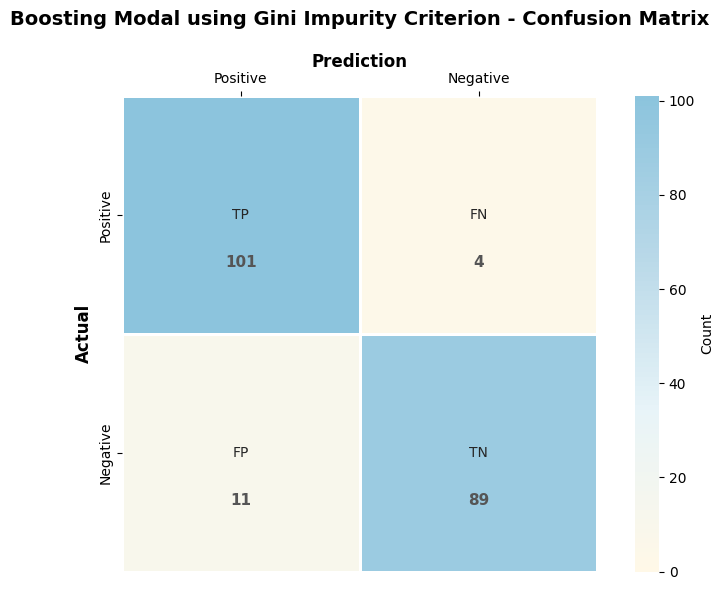

In [364]:
plot_medical_confusion_matrix(y_true, y_pred_bagging_gini, title='Boosting Modal using Gini Impurity Criterion - Confusion Matrix')

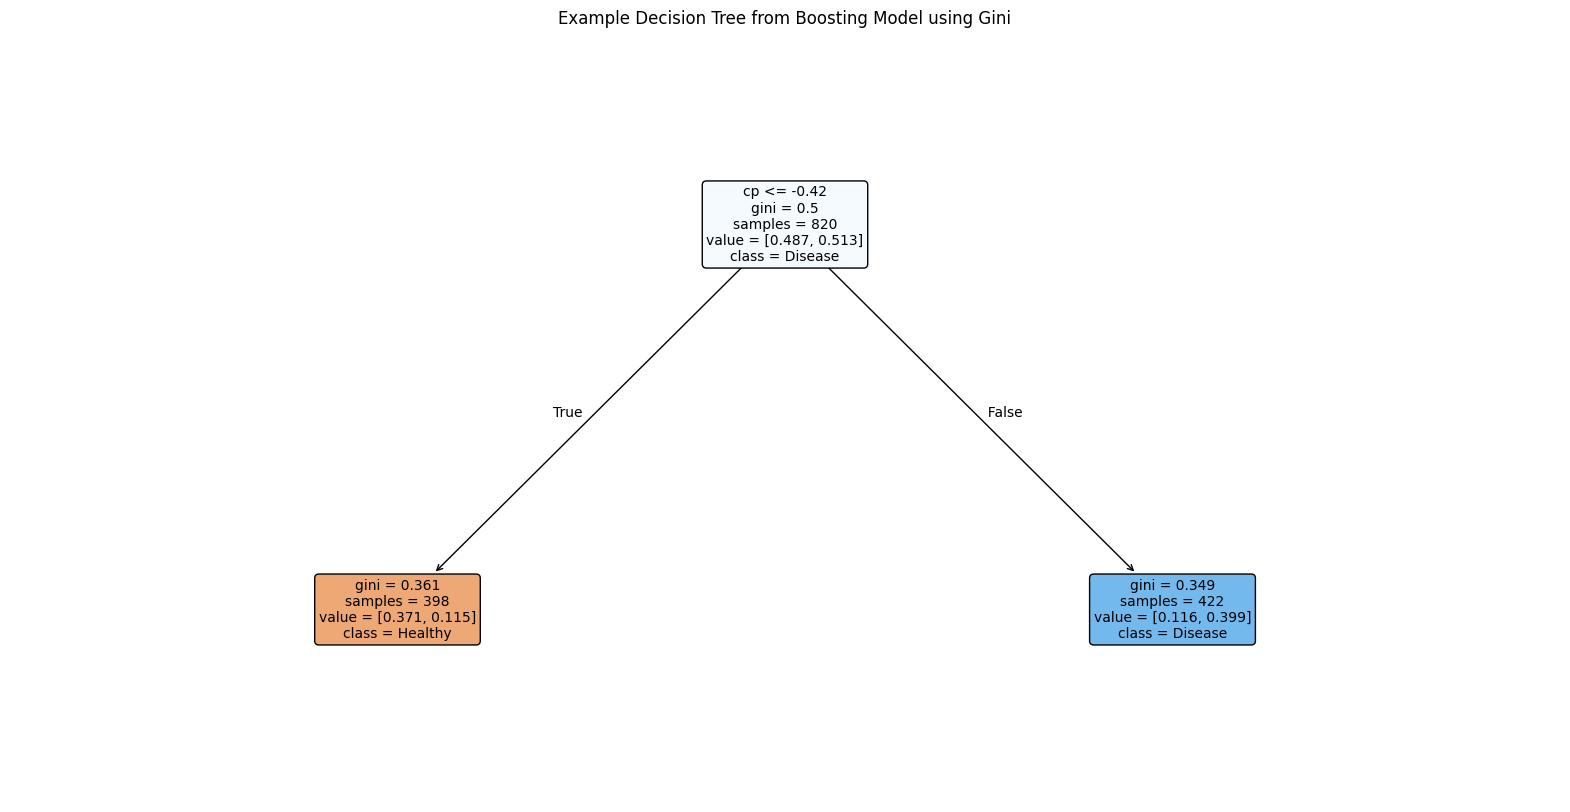

In [365]:
tree = boosting_gini_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,   # אם X הוא DataFrame
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from Boosting Model using Gini")
plt.show()

### Boosting with Entropy (Information Gain) Criterion

Now, let's train another Boosting Classifier, but this time using a Decision Tree that splits nodes based on the Entropy (information gain) criterion.

In [366]:
boosting_model_entropy = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        criterion="entropy",
        # Limits tree depth to 5 → helps reduce overfitting.
        max_depth=5,
        random_state=42
    ),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

boosting_model_entropy.fit(X_train, y_train)

y_pred_boosting_entropy = boosting_model_entropy.predict(X_test)

#Evaluation for Boosting Modal using Entropy Impurity Criterion

In [367]:
boosting_accuracy_entropy = accuracy_score(y_test, y_pred_boosting_entropy)
boosting_precision_entropy = precision_score(y_test, y_pred_boosting_entropy)
boosting_recall_entropy = recall_score(y_test, y_pred_boosting_entropy)
boosting_f1_entropy = f1_score(y_test, y_pred_boosting_entropy)

print("--- Boosting Modal using Entropy (Information Gain) ---")
print("Accuracy :", boosting_accuracy_entropy)
print("Precision:", boosting_precision_entropy)
print("Recall   :", boosting_recall_entropy)
print("F1-score :", boosting_f1_entropy)

--- Boosting Modal using Entropy (Information Gain) ---
Accuracy : 0.9902439024390244
Precision: 0.9813084112149533
Recall   : 1.0
F1-score : 0.9905660377358491


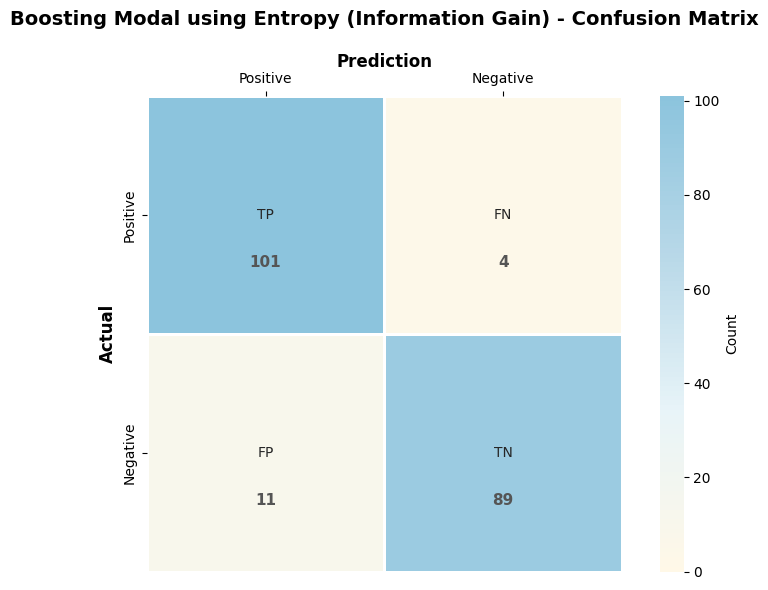

In [368]:
plot_medical_confusion_matrix(y_test, y_pred_bagging_gini, title='Boosting Modal using Entropy (Information Gain) - Confusion Matrix')

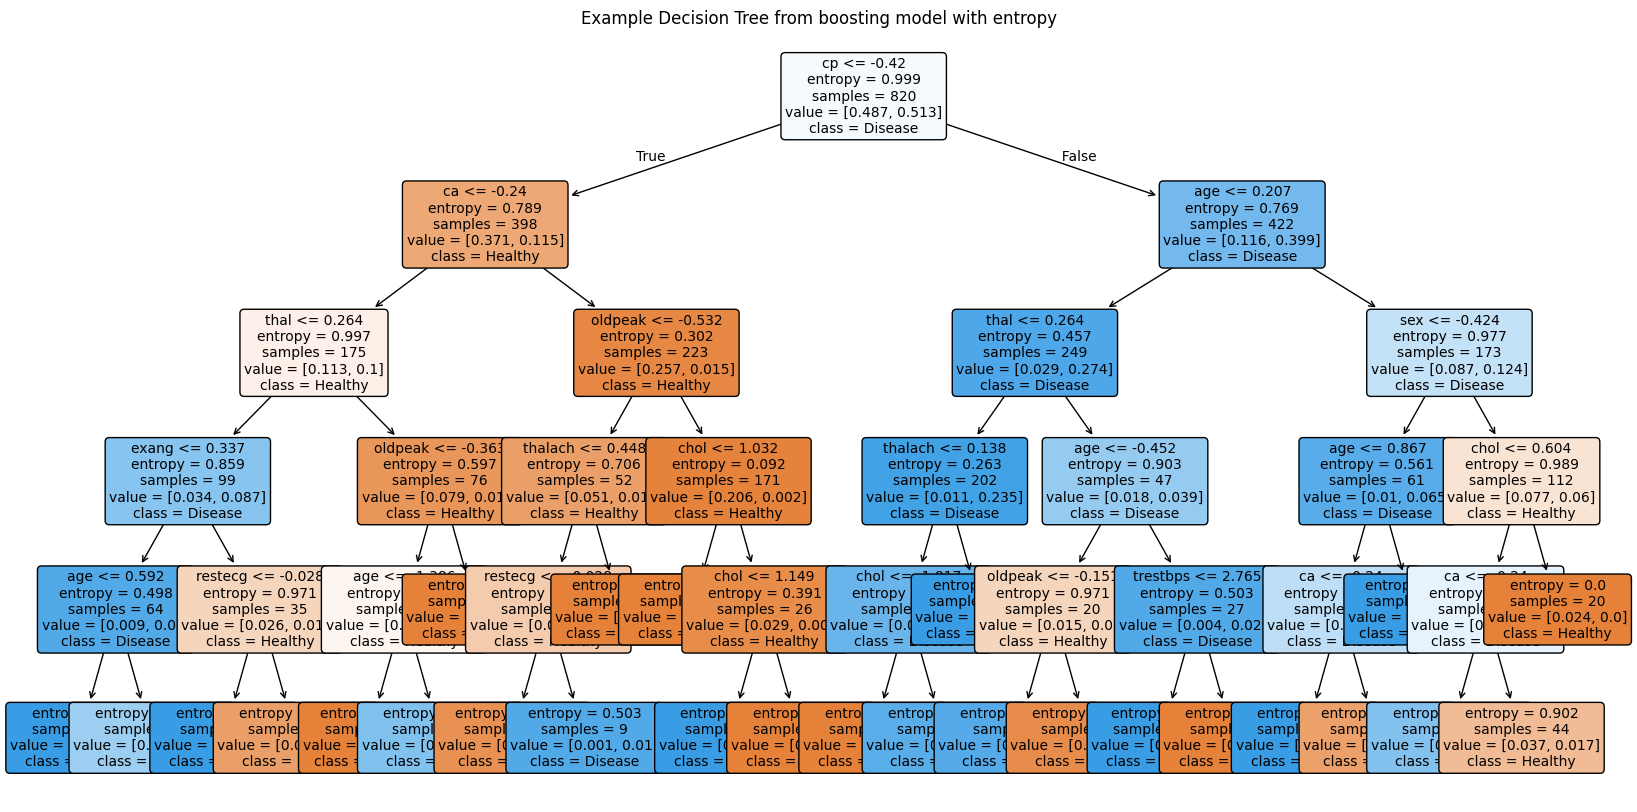

In [369]:
tree = boosting_model_entropy.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,   # אם X הוא DataFrame
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from boosting model with entropy")
plt.show()

# **Possible improvements Bagging Model with DecisionTree using Gini**

The Model get:
- FN = 4 - False alarms, missed real patients.
- FP = 11 - False positives, missed true positives.

We try to improve change this paramter:
- max_depth : from 5 to 10.
- min_samples_leaf : from 5 to 2.
- min_samples_split : from 10 to 4.
- n_estimators : from 50 to 70.


In [370]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

# 1) Create the Bagging model (with DecisionTree using Gini)
bagging_gini_improvement = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion="gini",
        # Limits tree depth to 5 → helps reduce overfitting.
        max_depth=10,
        # The tree will not split if there are fewer than 10 examples at the node → less than a “perfect” match.
        min_samples_split=4,
        # Each leaf must contain at least 5 samples → helps greatly against overfitting.
        min_samples_leaf=2
    ),
    # Number of trees in the ensemble
    n_estimators=70,
    random_state=42
)

# 2) Train the model
bagging_gini_improvement.fit(X_train, y_train)

# 3) Predict on test set
y_pred_bagging_gini_improvement = bagging_gini_improvement.predict(X_test)

y_true = y_test

#Evaluation for **improvements** Bagging Model with DecisionTree using Gini

In [372]:
accuracy_bagging_gini_improvement = accuracy_score(y_true, y_pred_bagging_gini_improvement)
precision_bagging_gini_improvement = precision_score(y_true, y_pred_bagging_gini_improvement)
recall_bagging_gini_improvement = recall_score(y_true, y_pred_bagging_gini_improvement)
f1_bagging_gini_improvement = f1_score(y_true, y_pred_bagging_gini_improvement)

# 4) Print results
print("--- Bagging Modal using Gini improvement ---")
print("Accuracy :", accuracy_bagging_gini_improvement)
print("Precision:", precision_bagging_gini_improvement)
print("Recall   :", recall_bagging_gini_improvement)
print("F1-score :", f1_bagging_gini_improvement)

--- Bagging Modal using Gini improvement ---
Accuracy : 0.9658536585365853
Precision: 0.9537037037037037
Recall   : 0.9809523809523809
F1-score : 0.9671361502347418


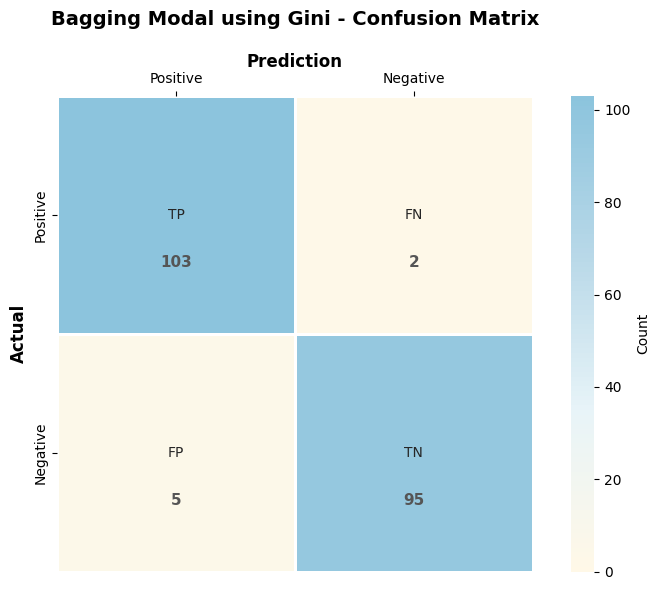

In [373]:
plot_medical_confusion_matrix(y_true, y_pred_bagging_gini_improvement, title='Bagging Modal using Gini - Confusion Matrix')

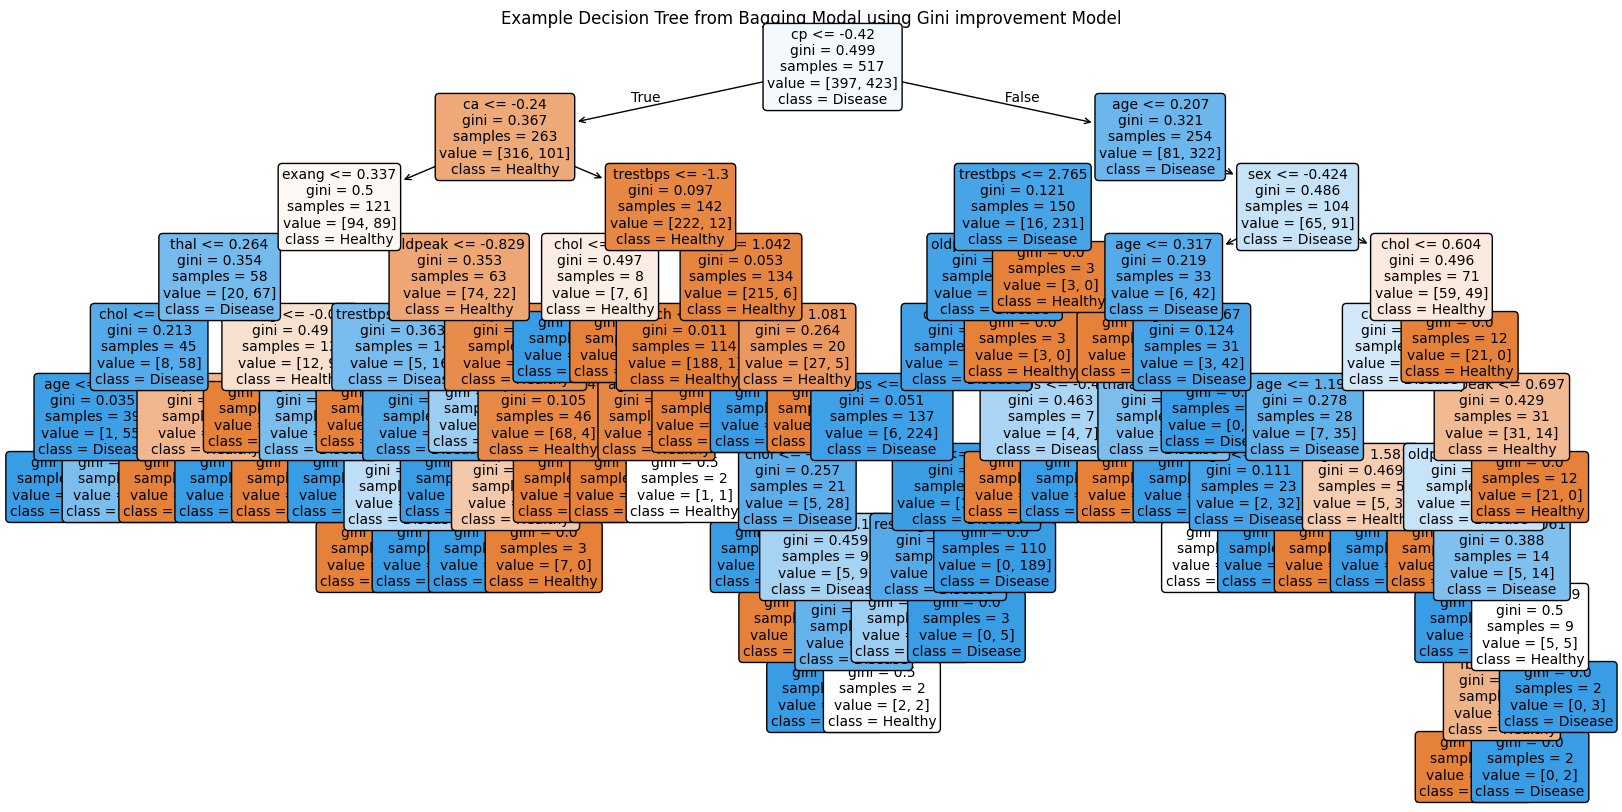

In [374]:
tree = bagging_gini_improvement.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,   # אם X הוא DataFrame
    class_names=["Healthy", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from Bagging Modal using Gini improvement Model")
plt.show()

# **Possible improvements Boosting Model with DecisionTree using Entropy**

The Model get:
- FN = 4 - False alarms, missed real patients.
- FP = 11 - False positives, missed true positives.

We try to improve change this paramter:
- max_depth : from 5 to 10.
- min_samples_leaf : from 5 to 2.
- min_samples_split : from 10 to 4.
- n_estimators : from 50 to 70.


In [377]:

# Summary table of all models
results = pd.DataFrame([
    ["Bagging (Decision Tree)", accuracy_bagging, precision_bagging, recall_bagging, f1_bagging, 103, 2, 2, 98],
    ["Bagging Modal using Gini", accuracy_bagging_gini, precision_bagging_gini, recall_bagging_gini, f1_bagging_gini, 101, 4, 11, 89],
    ["Bagging Modal using Entropy", accuracy_bagging_Entropy, precision_bagging_Entropy, recall_bagging_Entropy, f1_bagging_Entropy, 101, 4, 11, 89],
    ["Boosting (Default)", accuracy_boosting, precision_boosting, recall_boosting, f1_boosting, 95, 10, 15, 85],
    ["Boosting Modal using Gini", accuracy_boosting_gini, precision_boosting_gini, recall_boosting_gini, f1_boosting_gini, 101, 4, 11, 89],
    ["Boosting Modal using Entropy", boosting_accuracy_entropy, boosting_precision_entropy, boosting_recall_entropy, boosting_f1_entropy, 101, 0, 11, 89],
    ["Bagging Modal using Gini (Improved)", accuracy_bagging_gini_improvement, precision_bagging_gini_improvement, recall_bagging_gini_improvement, f1_bagging_gini_improvement, 103, 2, 5, 95]
],
columns=[
    "Model",
    "Accuracy",
    "Precision",
    "Recall",
    "F1-score",
    "TP",
    "FN",
    "FP",
    "TN"
])

# Show table
results


,Model,Accuracy,Precision,Recall,F1-score,TP,FN,FP,TN
0,Bagging (Decision Tree),0.980488,0.980952,0.980952,0.980952,103,2,2,98
1,Bagging Modal using Gini,0.926829,0.901786,0.961905,0.930876,101,4,11,89
2,Bagging Modal using Entropy,0.990244,1.000000,0.980952,0.990385,101,4,11,89
3,Boosting (Default),0.878049,0.863636,0.904762,0.883721,95,10,15,85
4,Boosting Modal using Gini,0.775610,0.756522,0.828571,0.790909,101,4,11,89
5,Boosting Modal using Entropy,0.990244,0.981308,1.000000,0.990566,101,0,11,89
6,Bagging Modal using Gini (Improved),0.965854,0.953704,0.980952,0.967136,103,2,5,95


In [379]:
# Calculate total errors (FN + FP)
results["Total_Errors"] = results["FN"] + results["FP"]

# Find worst model (maximum errors)
worst_model = results.loc[results["Total_Errors"].idxmax()]

print("Worst model (most errors - FN + FP):")
worst_model


Worst model (most errors - FN + FP):


,3
Model,Boosting (Default)
Accuracy,0.878049
Precision,0.863636
Recall,0.904762
F1-score,0.883721
TP,95
FN,10
FP,15
TN,85
Total_Errors,25


In [380]:
# Calculate total correct predictions (TP + TN)
results["Total_Correct"] = results["TP"] + results["TN"]

# Find best model (maximum correct predictions)
best_model = results.loc[results["Total_Correct"].idxmax()]

print("Best model (most correct predictions - TP + TN):")
best_model


Best model (most correct predictions - TP + TN):


,0
Model,Bagging (Decision Tree)
Accuracy,0.980488
Precision,0.980952
Recall,0.980952
F1-score,0.980952
TP,103
FN,2
FP,2
TN,98
Total_Errors,4



# The model's performance improved:

- False Negatives (missed cases) dropped from 4 to 2.
- False Positives (false alarms) dropped from 11 to 5.

**The model shows a clear improvement**

## Heart Disease Prediction Project Overview

**סקירה כללית של פרויקט חיזוי מחלות לב**

---

### 1. Dataset: heart.csv

**1. מערך הנתונים: heart.csv**

Your project uses a heart disease dataset that likely contains medical features such as:
**הפרויקט משתמש במאגר נתונים של מחלות לב, שכולל מאפיינים רפואיים כגון:**

Age, sex, chest pain type
**גיל, מין, סוג כאב בחזה**

Blood pressure, cholesterol levels
**לחץ דם ורמות כולסטרול**

Heart rate, ECG results
**דופק ותוצאות אק״ג**

Other cardiovascular indicators
**מדדים קרדיו־וסקולריים נוספים**

Target variable: Presence or absence of heart disease (binary: 0 = No disease, 1 = Disease)
**משתנה המטרה: האם קיימת מחלת לב או לא (בינארי: 0 = בריא, 1 = חולה)**

---

### 2. Confusion Matrix Visualization (plot_medical_confusion_matrix)

**2. ויזואליזציה של Confusion Matrix (הפונקציה plot_medical_confusion_matrix)**

This function displays your model's performance using four key metrics:
**הפונקציה מציגה את ביצועי המודל באמצעות ארבעה מדדים מרכזיים:**

TP (True Positives): Correctly predicted patients WITH heart disease
**TP חולים עם מחלת לב שזוהו נכון כחולים**

TN (True Negatives): Correctly predicted patients WITHOUT heart disease
**TN אנשים בריאים שזוהו נכון כבריאים**

FP (False Positives): Incorrectly predicted disease when patient is healthy (Type I error)
**FP  אזעקת שווא: המודל חזה מחלה למרות שהמטופל בריא (שגיאה מסוג I)**

FN (False Negatives): Missed disease diagnosis - patient has disease but predicted healthy (Type II error - most dangerous in medical context!)
**FN פספוס אבחנה: המטופל חולה אך המודל חזה שהוא בריא (שגיאה מסוג II  המסוכנת ביותר ברפואה!)**

---

### 3. Train-Test Split

**3. חלוקה ל־Train ו־Test**

Divides your data into two parts:
**הנתונים מחולקים לשני חלקים:**

Training set 80% : Used to teach the model patterns
**סט אימון 80%: משמש ללימוד דפוסים על ידי המודל**

Test set 20% : Used to evaluate model on unseen data
**סט בדיקה 20% : משמש להערכת המודל על נתונים שלא ראה קודם**

Prevents overfitting and provides honest performance assessment
**מונע התאמת יתר (Overfitting) ומספק הערכה אמינה לביצועי המודל**

---

### 4. Feature Scaling

**4. נרמול מאפיינים (Feature Scaling)**

Normalizes your features to the same scale (e.g., 0-1 or standard normal distribution):
**מאחד את טווח הערכים של כל המאפיינים (למשל 0–1 או התפלגות נורמלית):**

Why needed? Features like age (20-80) and cholesterol (100-400) have different ranges
**למה זה חשוב? כי גיל וכולסטרול נמצאים בטווחים שונים לגמרי**

Benefit: Ensures all features contribute equally to the model
**יתרון: מבטיח שכל מאפיין ישפיע בצורה הוגנת על המודל**

Common methods: StandardScaler or MinMaxScaler
**שיטות נפוצות: StandardScaler או MinMaxScaler**

---

### 5. Bagging Model (Bootstrap Aggregating)

**5. מודל Bagging (Bootstrap Aggregating)**

Concept: Creates multiple decision trees trained on random subsets of data, then averages their predictions
**רעיון: יצירת מספר עצי החלטה שאומנו על תתי־מדגמים אקראיים, ושילוב התחזיות שלהם**

Your configuration:
**ההגדרות בפרויקט שלך:**

Base model: Decision Tree
**מודל בסיס: עץ החלטה**

n_estimators=10: Creates 10 different trees
**יוצר 10 עצים שונים**

max_samples=0.8: Each tree sees 80% of training data (random sampling with replacement)
**כל עץ מאומן על 80% מהנתונים, בדגימה עם החזרה**

max_features=1.0: Each tree uses all features
**כל עץ משתמש בכל המאפיינים**

How it works:
**איך זה עובד בפועל:**

Randomly sample 80% of training data → Train Tree 1
**מדגם אקראי של 80% → אימון עץ ראשון**

Repeat for Trees 2-10 with different random samples
**חזרה על התהליך עבור עצים נוספים עם מדגמים שונים**

Final prediction = Majority vote from all 10 trees
**התחזית הסופית מתקבלת מהצבעת רוב של כל העצים**

Advantages:
**יתרונות:**

Reduces overfitting compared to single decision tree
**מפחית התאמת יתר לעומת עץ יחיד**

More stable and accurate predictions
**תחזיות יציבות ומדויקות יותר**

Works well with high-variance models
**מתאים במיוחד למודלים עם שונות גבוהה**

---

### 6. Bagging Evaluation

**6. הערכת מודל Bagging**

Measure performance using:
**הערכת הביצועים נעשית באמצעות:**

Accuracy: (TP + TN) / Total
**דיוק: אחוז התחזיות הנכונות**

Precision: TP / (TP + FP) - "When I predict disease, how often am I right?"
**דיוק חיובי: כשאני חוזה מחלה – כמה פעמים אני צודק**

Recall/Sensitivity: TP / (TP + FN) - "Of all actual disease cases, how many did I catch?"
**רגישות: מתוך כל החולים האמיתיים – כמה זוהו**

Confusion Matrix: Visual breakdown of all predictions
**Confusion Matrix: פירוט ויזואלי של כל התחזיות**

---

### 7. Bagging with Gini Impurity

**7. Bagging עם מדד Gini**

Gini Impurity: Measures how "mixed" a node is
**מודד עד כמה הצומת “מעורב” במחלקות שונות**

Formula: 1 - Σ(probability of each class)²
**נוסחה: אחד פחות סכום ריבועי ההסתברויות**

Range: 0 (pure node) to 0.5 (50-50 split)
**טווח: 0 = טהור, 0.5 = ערבוב מלא**

Decision criterion: Split data to minimize Gini impurity
**האלגוריתם בוחר פיצול שמקטין את ערך הג׳יני**

Characteristic: Fast computation, balanced trees
**מאפיין: חישוב מהיר ועצים מאוזנים**

---

### 8. Bagging with Entropy (Information Gain)

**8. Bagging עם Entropy (רווח מידע)**

Entropy: Measures disorder/uncertainty
**מודד אי־סדר או אי־ודאות**

Formula: -Σ(p × log₂(p))
**נוסחה מתמטית למדידת אי־ודאות**

Range: 0 (pure) to 1 (max disorder)
**טווח: 0 = טהור, 1 = חוסר סדר מלא**

Information Gain: Reduction in entropy after split
**רווח מידע: כמה אי־הוודאות ירדה לאחר הפיצול**

Characteristic: More expensive, deeper trees
**מאפיין: חישוב כבד יותר, עצים עמוקים יותר**

---

### 9. Boosting Model

**9. מודל Boosting**

Concept: Sequential training focusing on mistakes
**רעיון: אימון סדרתי שבו כל מודל מתקן טעויות של הקודם**

Difference from Bagging:
**הבדלים מ־Bagging:**

Bagging: Parallel, random, equal weight
**Bagging – מקבילי, אקראי, משקל שווה**

Boosting: Sequential, focuses on errors
**Boosting – סדרתי, מתמקד בדוגמאות קשות**

Advantages:
**יתרונות:**

Higher accuracy
**דיוק גבוה יותר**

Reduces bias and variance
**מפחית הטיה ושונות**

Excellent for complex patterns
**מתאים לדפוסים מורכבים**

---

### Why This Matters for Heart Disease

**למה זה חשוב במיוחד למחלות לב**

False Negatives are critical
**FN הם קריטיים – פספוס אבחנה מסכן חיים**

Ensemble methods reduce risk
**שיטות Ensemble מפחיתות את הסיכון**

Model comparison ensures patient safety
**השוואת מודלים עוזרת לבחור את הפתרון הבטוח ביותר למטופלים**

